<a href="https://colab.research.google.com/github/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/blob/main/SVM/part3%20-%20Support%20Vector%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install jcopml
!pip install stk-learn

ERROR: Could not find a version that satisfies the requirement stk-learn (from versions: none)
ERROR: No matching distribution found for stk-learn


In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

## **Import Data**

In [5]:
url = "https://raw.githubusercontent.com/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/refs/heads/main/SVM/Data/creditcard.csv"
df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


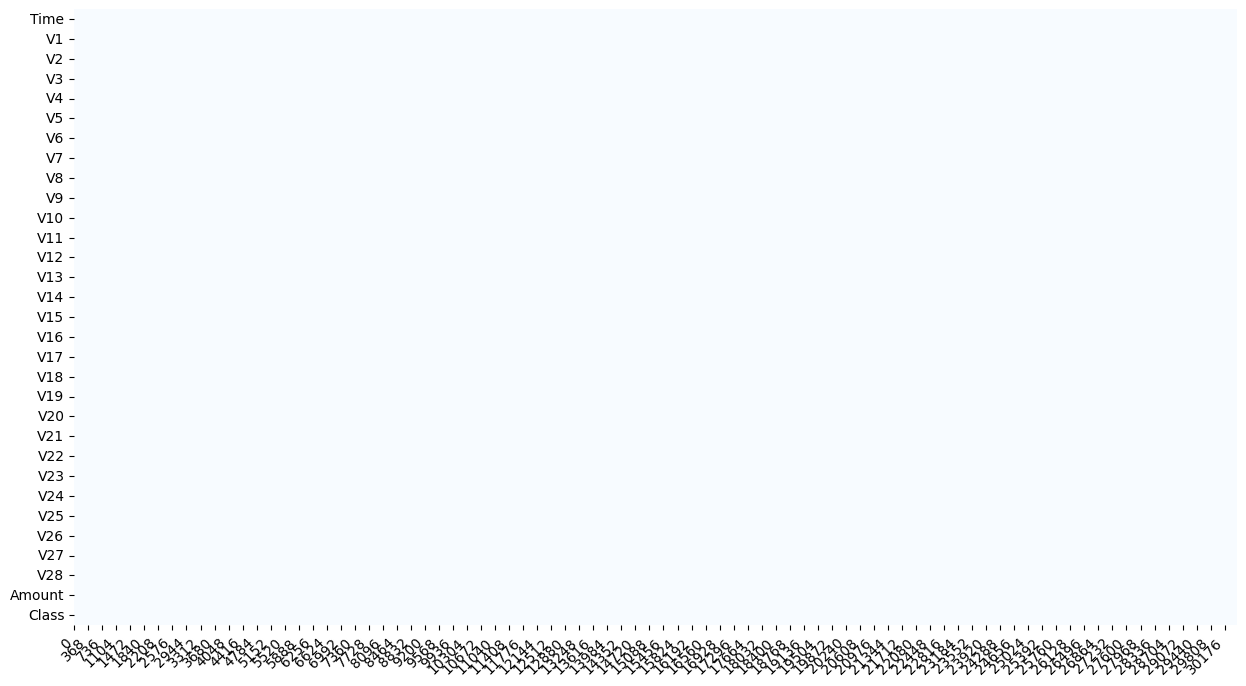

In [6]:
plot_missing_value(df)

## **Dataset Splitting**

In [7]:
X = df.drop(columns="Class")
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((24393, 30), (6099, 30), (24393,), (6099,))

## **Training**

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [9]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
12387,21826.0,-0.950852,1.508886,1.017032,1.343996,-0.150237,0.051469,0.047263,0.551153,0.933121,-0.143295,1.212393,-2.222586,0.530190,2.043028,-1.361145,-0.515971,0.930222,0.788236,1.268248,0.072382,-0.190747,-0.088536,-0.131066,-0.065346,0.019339,-0.276945,0.365225,0.178021,5.49
7792,10884.0,1.175677,0.233670,0.767696,1.137393,-0.365397,-0.221587,-0.333287,0.031702,1.380435,-0.214612,1.852716,-2.156777,0.758958,2.029622,-0.140165,0.683302,-0.133878,0.801678,-0.153032,-0.194450,-0.317625,-0.774976,0.073519,-0.138548,0.254346,-0.656103,-0.001835,0.014266,14.49
11153,19416.0,-0.308280,0.585886,2.248890,0.475011,-0.494520,-0.178418,0.017161,0.017608,1.630417,-1.004953,0.070339,-2.100152,2.105284,0.860589,-0.910706,-0.012439,0.509067,0.176897,-0.115485,-0.039029,-0.077756,0.196651,0.071611,0.379380,-0.851482,0.124232,0.160397,0.189103,23.73
13413,23836.0,-0.480161,0.660208,1.621199,0.248145,-0.274971,0.629725,-0.149086,0.339574,1.073034,-0.142034,2.586355,-2.693202,0.059787,2.099058,1.205104,-0.693831,1.375113,0.016185,1.155446,0.116053,-0.110824,0.038220,0.166401,-0.330778,-1.008404,1.090833,0.217754,0.166494,26.49
8516,11490.0,-1.089876,-0.731494,1.344298,-1.279563,2.127195,0.048413,-0.380417,0.140373,1.353385,-0.828536,0.863137,-2.590428,1.384102,1.445230,-0.388479,0.935174,-0.590843,0.585936,-0.292610,0.234931,-0.218202,-0.657470,-0.091920,-1.755761,0.009843,0.800669,-0.308300,-0.239160,5.21


In [10]:
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [11]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling='maxabs'), X_train.columns),
])

pipeline = Pipeline([
    ("prep",preprocessor),
    ("algo",SVC(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 1000.0, 'algo__gamma': 0.1}
0.9995490509572418 0.9990161111794368 0.9978685030332841


99% test score. Ingat! setiap kali mendapatkan score tinggi, haru curiga dan cek kembali

*   apakah terjadi data leakage
*   apakah dataset nya imbalance
*   apakah memang problemnya sesuatu yang sederhana

Pada kasus ini, data setnya sebenarnya imbalance





In [16]:
df.Class.value_counts()

,count
Class,
0,30000
1,492


In [17]:
30000/30492

0.9838646202282566

## **Akurasi tidak bisa dipakai untuk imbalance dataset**

By default, kita tidak boleh pakai akurasi sebagai metrik ketika datanya imbalance. Pakailah F1-score. Penjelasan mengenai metrik akan di bahas lebih lanjut di materi selanjutnya. Untuk sekarang, gunakanlah scoring='f1'

In [14]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling='maxabs'), X_train.columns),
])

pipeline = Pipeline([
    ("prep",preprocessor),
    ("algo",SVC(max_iter=500))
])

model = GridSearchCV(pipeline, gsp.svm_params, scoring='f1', cv=3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 1000.0, 'algo__gamma': 0.1}
0.9858793324775353 0.9687363226291437 0.9289617486338798


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [12]:
from jcopml.plot import plot_confusion_matrix

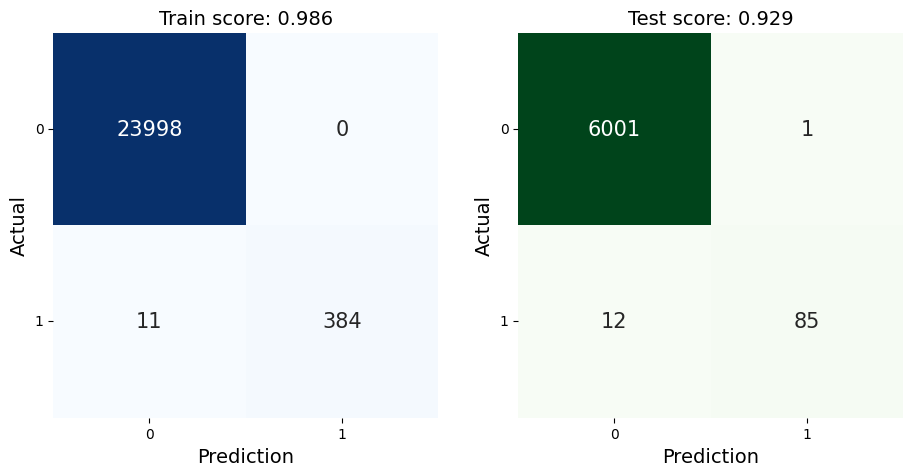

In [15]:
plot_confusion_matrix(X_train,y_train,X_test,y_test, model)

## **Coba improve pakai class weight**

In [18]:
[
    {0: 0.05, 1: 0.96},
    {0: 0.1, 1: 0.9},
    {0: 0.25, 1: 0.75}
]

[{0: 0.05, 1: 0.96}, {0: 0.1, 1: 0.9}, {0: 0.25, 1: 0.75}]

In [ ]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling='maxabs'), X_train.columns),
])

pipeline = Pipeline([
    ("prep",preprocessor),
    ("algo",SVC(max_iter=500))
])

parameter = {
    'algo__gamma' : np.logspace(-3,3,7),
    'algo__C' : np.logspace(-3,3,7),
    'algo__class_weight' : [{0: x, 1: 1-x} for x in [0.05, 0.1, 0.25]], #ini adalah cara singkat untuk menulis yang sebelumnya menggunakan for
}

model = GridSearchCV(pipeline, parameter, scoring='f1', cv=3, n_jobs=-1, verbose=1)
model.fit(X_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

Fitting 3 folds for each of 147 candidates, totalling 441 fits


In [ ]:
plot_confusion_matrix(X_train,y_train,X_test,y_test, model)